In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [ ]:
!unzip model_data.zip

Archive:  model_data.zip
  inflating: oxford_lockdown_sensor_merged_2020.csv  
  inflating: __MACOSX/._oxford_lockdown_sensor_merged_2020.csv  
  inflating: final_2019_sensor_city_merged.csv  
  inflating: __MACOSX/._final_2019_sensor_city_merged.csv  
  inflating: final_2019_2020_sensor_city_merged.csv  
  inflating: __MACOSX/._final_2019_2020_sensor_city_merged.csv  


In [ ]:
df_final = pd.read_csv('final_2019_2020_sensor_city_merged.csv')

In [ ]:
df_final.columns

Index(['week', 'timestamp', 'country', 'NAME_0', 'NAME_2', 'GID_0',
       'POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN', 'PM2.5_Value',
       'FID_Sensor', 'latitude_sensor', 'longitude_sensor', 'location',
       'GID_2', 'NAME_1', 'TYPE_2', 'key_right', 'key_left_1', 'country_name',
       'Week', 'population_count_2018', 'average_population_density',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'workplace_closure',
       'restrictions_internal_movement', 'stay_at_home_requirements',
       'gini_coefficient', 'key_right_1', 'week_1', 'week_2', 'week_final',
       'key_lockdown_left'],
      dtype='object')

In [ ]:
drop_col = ['timestamp', 'country', 'NAME_0', 'NAME_2', 'GID_0',
       'location',
       'GID_2', 'NAME_1', 'TYPE_2', 'key_right', 'key_left_1', 'country_name',
       'Week', 'population_count_2018','retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'workplace_closure',
       'restrictions_internal_movement', 'stay_at_home_requirements',
       'gini_coefficient', 'key_right_1', 'week_1', 'week_2', 'week_final',
       'key_lockdown_left']

In [ ]:
features1 = ['C1_School closing_0.0', 'C1_School closing_1.0',
       'C1_School closing_2.0', 'C1_School closing_3.0', 'C1_Flag_0.0',
       'C1_Flag_1.0', 'C2_Workplace closing_0.0', 'C2_Workplace closing_1.0',
       'C2_Workplace closing_2.0', 'C2_Workplace closing_3.0', 'C2_Flag_0.0',
       'C2_Flag_1.0', 'C3_Cancel public events_0.0',
       'C3_Cancel public events_1.0', 'C3_Cancel public events_2.0',
       'C3_Flag_0.0', 'C3_Flag_1.0', 'C4_Restrictions on gatherings_0.0',
       'C4_Restrictions on gatherings_1.0',
       'C4_Restrictions on gatherings_2.0',
       'C4_Restrictions on gatherings_3.0',
       'C4_Restrictions on gatherings_4.0', 'C4_Flag_0.0', 'C4_Flag_1.0',
       'C5_Close public transport_0.0', 'C5_Close public transport_1.0',
       'C5_Close public transport_2.0', 'C5_Flag_0.0', 'C5_Flag_1.0',
       'C6_Stay at home requirements_0.0', 'C6_Stay at home requirements_1.0',
       'C6_Stay at home requirements_2.0', 'C6_Stay at home requirements_3.0',
       'C6_Flag_0.0', 'C6_Flag_1.0',
       'C7_Restrictions on internal movement_0.0',
       'C7_Restrictions on internal movement_1.0',
       'C7_Restrictions on internal movement_2.0', 'C7_Flag_0.0',
       'C7_Flag_1.0', 'C8_International travel controls_0.0',
       'C8_International travel controls_1.0',
       'C8_International travel controls_2.0',
       'C8_International travel controls_3.0',
       'C8_International travel controls_4.0']

In [ ]:
df_final.drop(columns=drop_col, inplace=True )

In [ ]:
# df_final[df_final['NO2'].isna()==True]
len(df_final)

85689

In [ ]:
df_final.head()

,week,POP_DEN_Sensor,AOD_Sensor,PRECIP_Sensor,NO2_Sensor,city_PRECIP,city_AOD,city_NO2,city_POP_DEN,PM2.5_Value,FID_Sensor,latitude_sensor,longitude_sensor,average_population_density
0,2019-01-01_2019-01-08,3.069481,91.403274,0.000731,0.000032,0.009027,71.006598,0.000020,0.988135,2.659339,0,-53.1583,-70.9215,26.833029
1,2019-01-08_2019-01-15,3.069481,81.134797,0.013004,0.000030,0.013793,57.205753,0.000019,0.988135,3.685536,0,-53.1583,-70.9215,26.833029
2,2019-01-15_2019-01-22,3.069481,84.063368,0.008275,0.000031,0.010815,68.477023,0.000019,0.988135,4.602024,0,-53.1583,-70.9215,26.833029
3,2019-01-22_2019-01-29,3.069481,75.492799,0.000000,0.000031,0.017925,63.187801,0.000019,0.988135,3.607738,0,-53.1583,-70.9215,26.833029
4,2019-01-29_2019-02-05,3.069481,51.459077,0.000137,0.000031,0.007730,28.059073,0.000019,0.988135,3.467605,0,-53.1583,-70.9215,26.833029


In [ ]:
dff = df_final.dropna()

In [ ]:
dff.columns
len(dff)

80991

In [ ]:
# df_final = df_final.fillna(0)

In [ ]:
y = dff[['PM2.5_Value','FID_Sensor']]
X = dff[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'FID_Sensor']]
      #  'average_population_density', 'week', 'latitude_sensor', 'longitude_sensor']]
      #   'C1_School closing_0.0',
      #  'C1_School closing_1.0', 'C1_School closing_2.0',
      #  'C1_School closing_3.0', 'C1_Flag_0.0', 'C1_Flag_1.0',
      #  'C2_Workplace closing_0.0', 'C2_Workplace closing_1.0',
      #  'C2_Workplace closing_2.0', 'C2_Workplace closing_3.0', 'C2_Flag_0.0',
      #  'C2_Flag_1.0', 'C3_Cancel public events_0.0',
      #  'C3_Cancel public events_1.0', 'C3_Cancel public events_2.0',
      #  'C3_Flag_0.0', 'C3_Flag_1.0', 'C4_Restrictions on gatherings_0.0',
      #  'C4_Restrictions on gatherings_1.0',
      #  'C4_Restrictions on gatherings_2.0',
      #  'C4_Restrictions on gatherings_3.0',
      #  'C4_Restrictions on gatherings_4.0', 'C4_Flag_0.0', 'C4_Flag_1.0',
      #  'C5_Close public transport_0.0', 'C5_Close public transport_1.0',
      #  'C5_Close public transport_2.0', 'C5_Flag_0.0', 'C5_Flag_1.0',
      #  'C6_Stay at home requirements_0.0', 'C6_Stay at home requirements_1.0',
      #  'C6_Stay at home requirements_2.0', 'C6_Stay at home requirements_3.0',
      #  'C6_Flag_0.0', 'C6_Flag_1.0',
      #  'C7_Restrictions on internal movement_0.0',
      #  'C7_Restrictions on internal movement_1.0',
      #  'C7_Restrictions on internal movement_2.0', 'C7_Flag_0.0',
      #  'C7_Flag_1.0', 'C8_International travel controls_0.0',
      #  'C8_International travel controls_1.0',
      #  'C8_International travel controls_2.0',
      #  'C8_International travel controls_3.0',
      #  'C8_International travel controls_4.0']]
      #  'grocery_and_pharmacy_percent_change_from_baseline',
      #  'parks_percent_change_from_baseline',
      #  'transit_stations_percent_change_from_baseline',
      #  'workplaces_percent_change_from_baseline',
      #  'residential_percent_change_from_baseline', 'workplace_closure',
      #  'restrictions_internal_movement', 'stay_at_home_requirements',

In [ ]:
import random 
def Rand(start, end, num): 
    res = []
    random.seed(42)   
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res 
list_fid= Rand(0,1600,200)

In [ ]:
FID_list = [i for i in range(1600)]

In [ ]:
l3 = [x for x in list_fid if x not in FID_list]
l3

[]

In [ ]:
X.columns
y_test = y[y.FID_Sensor.isin(list_fid)]
X_test = X[X.FID_Sensor.isin(list_fid)]
y_train =y[~y.FID_Sensor.isin(list_fid)]
X_train = X[~X.FID_Sensor.isin(list_fid)]
len(X_train),len(X_test)

(71263, 9728)

In [ ]:
#y_train = y_train[['PM2.5_Value','FID_Sensor']]
X_train = X_train[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'FID_Sensor']]

In [ ]:
X_test=X_test.drop(columns='FID_Sensor').reset_index(drop=True)
X_train=X_train.drop(columns='FID_Sensor').reset_index(drop=True)
y_test=y_test.drop(columns='FID_Sensor').reset_index(drop=True)
y_train=y_train.drop(columns='FID_Sensor').reset_index(drop=True)

In [ ]:
##Split for Training & Test Sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify= 'FID_Sensor')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71263, 8)
(71263, 1)
(9728, 8)
(9728, 1)


In [ ]:
# regr = make_pipeline(StandardScaler(), XGB(C=1.0, epsilon=0.2))
# regr.fit(X_train, y_train)

In [ ]:
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
              'seed': [42]}
# parameters = {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 
#               'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 
#               'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  4.1min finished


0.27414520790646607
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'seed': 42, 'silent': 1, 'subsample': 0.7}


In [ ]:
regr = make_pipeline(StandardScaler(), XGBRegressor( 
       colsample_bytree=0.7, learning_rate=0.05, 
       max_depth=6, min_child_weight=4,  n_estimators=500,
    nthread=4, objective='reg:linear', seed= 42,
       reg_alpha=0, reg_lambda=1, 
       silent=True, subsample=0.7))
regr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain', learning_rate=0.05,
                              max_delta_step=0, max_depth=6, min_child_weight=4,
                              missing=None, n_estimators=500, n_jobs=1,
                              nthread=4, objective='reg:linear', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=42, silent=True, subsample=0.7,
                              verbosity=1))],
         verbose=False)

In [ ]:
# XGBRegressor.fea
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [ ]:
regr = make_pipeline(StandardScaler(), svr)
regr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
#Useless for the time being
# y_pred = xgb1.predict(X_test)
# parameters = {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 
#               'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 
#               'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

In [ ]:
y_pred = regr.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
print(mae)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)

# string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
# fig, ax = plt.subplots(figsize=(5, 5))
# plt.scatter(y_test, y_pred)
# ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
# plt.title('Initial Tria')
# plt.ylabel('Model predictions')
# plt.xlabel('Truths')
# plt.xlim([0, 27])
# _ = plt.ylim([0, 27])
#3.590260009765302
#20.11628485611695
#Spatial - test -> 4.892884264967508, 26.933846863789856

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
importance = model.coef_
importance

array([[ 1.55530058e-03,  2.30054772e-02, -1.59338854e+01,
         2.48141021e+05, -2.34711215e+01,  5.48798482e-02,
         3.13015895e+04,  1.59441599e-03,  2.02691160e-02,
        -6.82460635e-03],
       [-3.49428008e-16, -3.33066907e-16,  1.20494243e-12,
         1.09765356e-09, -1.06349270e-14,  2.87096735e-16,
         5.45492626e-10,  1.11022302e-16, -3.46944695e-16,
         1.00000000e+00]])

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
# model = LinearRegression()
# # fit the model
# model.fit(X, y)
# get importance
#importance = xgb1.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X=X.drop(columns='FID_Sensor')
y=y.drop(columns='FID_Sensor')

Feature: 0, Score: 0.05797
Feature: 1, Score: 0.25045
Feature: 2, Score: 0.05829
Feature: 3, Score: 0.16509
Feature: 4, Score: 0.10531
Feature: 5, Score: 0.11683
Feature: 6, Score: 0.07425
Feature: 7, Score: 0.06414
Feature: 8, Score: 0.10768


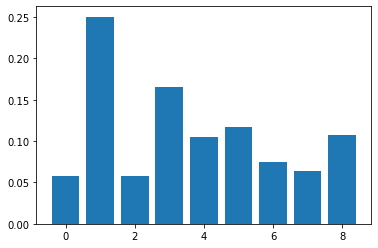

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %0d, Score: %.5f' % (X.columns[i],i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: POP_DEN_Sensor 0, Score: 0.07057
Feature: AOD_Sensor 1, Score: 0.25408
Feature: PRECIP_Sensor 2, Score: 0.06069
Feature: NO2_Sensor 3, Score: 0.16946
Feature: city_PRECIP 4, Score: 0.10611
Feature: city_AOD 5, Score: 0.11008
Feature: city_NO2 6, Score: 0.07214
Feature: city_POP_DEN 7, Score: 0.06356
Feature: average_population_density 8, Score: 0.09332


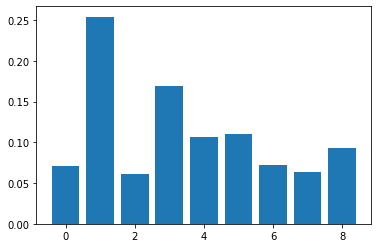

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %0d, Score: %.5f' % (X_train.columns[i],i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from matplotlib import pyplot
# # define the model
# model = RandomForestClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

Feature: POP_DEN_Sensor 0, Score: 0.06130
Feature: AOD_Sensor 1, Score: 0.19291
Feature: PRECIP_Sensor 2, Score: 0.06687
Feature: NO2_Sensor 3, Score: 0.11511
Feature: city_PRECIP 4, Score: 0.08778
Feature: city_AOD 5, Score: 0.08527
Feature: city_NO2 6, Score: 0.06350
Feature: city_POP_DEN 7, Score: 0.05665
Feature: average_population_density 8, Score: 0.27061


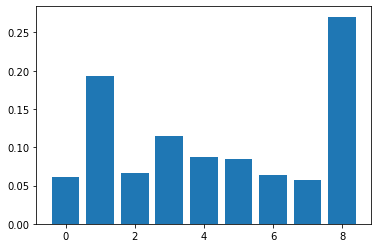

In [ ]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = XGBRegressor( 
       colsample_bytree=0.7, learning_rate=0.05, 
       max_depth=6, min_child_weight=4,  n_estimators=500,
    nthread=4, objective='reg:linear', seed= 42,
       reg_alpha=0, reg_lambda=1, 
       silent=True, subsample=0.7)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %0d, Score: %.5f' % (X_train.columns[i],i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 545.72653
Feature: 1, Score: 337.30359
Feature: 2, Score: 0.63377
Feature: 3, Score: 0.10547
Feature: 4, Score: 0.59314
Feature: 5, Score: 248.95527
Feature: 6, Score: 0.07508
Feature: 7, Score: 377.84674
Feature: 8, Score: 258.63453


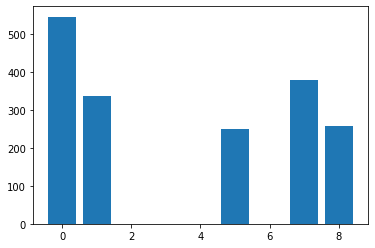

In [ ]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# import pandas as pd
# fin = pd.read_csv('final_merged.csv')
# df1 = fin.fillna(method='ffill')
# fin = df1.fillna(0)

In [ ]:
# y = fin['value']
# X = fin[['POP_DEN', 'AOD', 'PRECIP', 'NO2']]
# X.dtypes

In [ ]:
#not used
n_folds = 2

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
#     rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)
def Stacking(model,train,y,test,n_fold):
  folds=KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
  return test_pred.reshape(-1,1),train_pred


# def Stacking(model,train,y,test,n_fold):
#   folds=KFold(n_splits=n_fold)
#   test_pred=np.empty((test.shape[0],1),float)
#   train_pred=np.empty((0,1),float)
#   for train_indices,val_indices in folds.split(train,y.values):
#     x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
#     y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

#     model.fit(X=x_train,y=y_train)
#     train_pred=np.append(train_pred,model.predict(x_val))
#     test_pred=np.append(test_pred,model.predict(test))
#   return test_pred.reshape(-1,1),train_pred

In [ ]:
from xgboost import XGBRegressor
model1 = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

AttributeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=2,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

AttributeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LinearRegression()
model.fit(df,y_train)
model.score(df_test, y_test)

ValueError: ignored

In [ ]:
y_test

,PM2.5_Value
0,4.250000
1,7.238095
2,5.803571
3,6.261905
4,7.755952
...,...
9723,3.725432
9724,3.104212
9725,3.686197
9726,7.000000


In [ ]:
y_test.shape

(9728, 1)

In [ ]:
y_train.shape

(71263, 1)

In [ ]:
from xgboost import XGBRegressor
from math import sqrt
XGB_model = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)
XGB_model.fit(X_train, y_train)
y_XGB_predict = XGB_model.predict(X_test)

XGB_model_error = sqrt(mean_squared_error(y_test, y_XGB_predict)) 

print(f'XGBoost Mean Squared Error - {XGB_model_error}')

KeyboardInterrupt: ignored

In [ ]:
lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=300)

lgb_model.fit(X_train, y_train)
y_LGB_predict = lgb_model.predict(X_test)

LGB_model_error = sqrt(mean_squared_error(y_test,y_LGB_predict))

print(f'LGBM Mean Squared Error - {LGB_model_error}')

LGBM Mean Squared Error - 20.675586825751292


In [ ]:
ensembled_prediction = (0.5*y_XGB_predict)+(0.5*y_LGB_predict)
ensembled_prediction_error = sqrt(mean_squared_error(y_test, ensembled_prediction))

print(f'Ensembled Mean Squared Error - {ensembled_prediction_error}')

Ensembled Mean Squared Error - 21.259981658241582


In [ ]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('xgb',XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['xgb'] = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>xgb -8.464 (0.014)
>cart -11.375 (0.020)


KeyboardInterrupt: ignored

In [ ]:
import sklearn.metrics
from sklearn.metrics import r2_score
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

>xgb 0.508 (0.011)
>lgb 0.541 (0.010)
>rf 0.524 (0.015)
>stacking 0.514 (0.013)


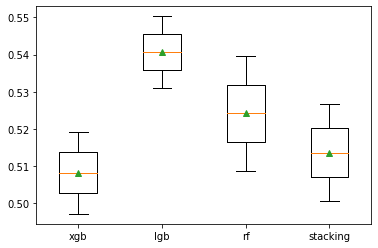

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('xgb',XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)))
	level0.append(('lgb', lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=300)))
	level0.append(('rf', RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['xgb'] = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)
	models['lgb'] = lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=300)
	models['rf'] = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
	#scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = X_train, y_train#get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# y_train_pred = models.predict(X_train)
# y_test_pred = models.predict(X_test.iloc[:,:9])
# print("Training: {}".format(mean_squared_error(y_train_pred,y_train, squared=False)))
# print("Test: {}".format(mean_squared_error(y_test_pred,y_test, squared=False)))
# print("Training: {}".format(r2_score(y_train_pred,y_train)))
# print("Test: {}".format(r2_score(y_test_pred,y_test)))

AttributeError: ignored

In [ ]:
# import pickle

# filename = 'finalized_model.sav'
# pickle.dump(models, open(filename, 'wb'))


In [ ]:
#this is the one!
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot

def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('xgb',XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)))
	level0.append(('lgb', lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=300)))
	level0.append(('rf', RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')))
	# define meta learner model
	# level1 = LinearRegression()
	level1 = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2)
	return model


In [ ]:
#Required!!
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# reg = get_stacking().fit(X_train, y_train)
regr = make_pipeline(StandardScaler(), get_stacking())
regr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = regr.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
print(mae)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)

5.735217240823282
22.706250369643467


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4377926239678973

In [ ]:
!ls /content/drive

MyDrive


In [ ]:
import pickle
filename = '/content/drive/My Drive/UNICEF/finalized_model_no_pop_den.sav'
pickle.dump(regr, open(filename, 'wb'))

In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test.iloc[:,:9])

In [ ]:
from sklearn.metrics import r2_score
print("Training: {}".format(mean_squared_error(y_train_pred,y_train, squared=False)))
print("Test: {}".format(mean_squared_error(y_test_pred,y_test, squared=False)))
print("Training: {}".format(r2_score(y_train_pred,y_train)))
print("Test: {}".format(r2_score(y_test_pred,y_test)))

Training: 18.885998720334317
Test: 20.92220486846628
Training: 0.10330109455577619
Test: 0.11271265290928623


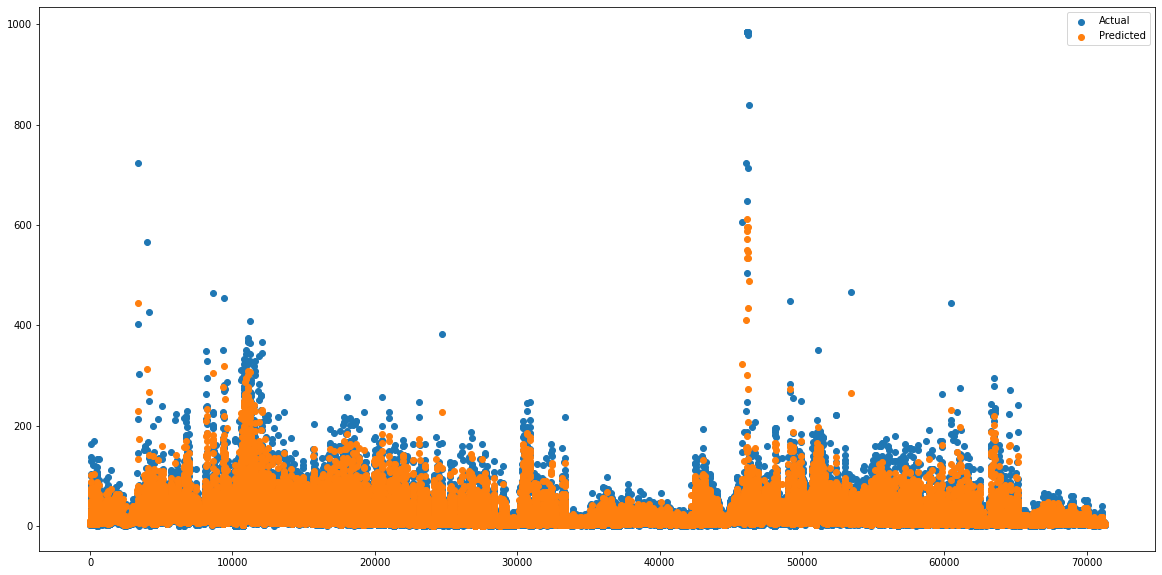

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_train.index,y_train)
ax.scatter(X_train.index,y_train_pred)
ax.legend(['Actual','Predicted'])

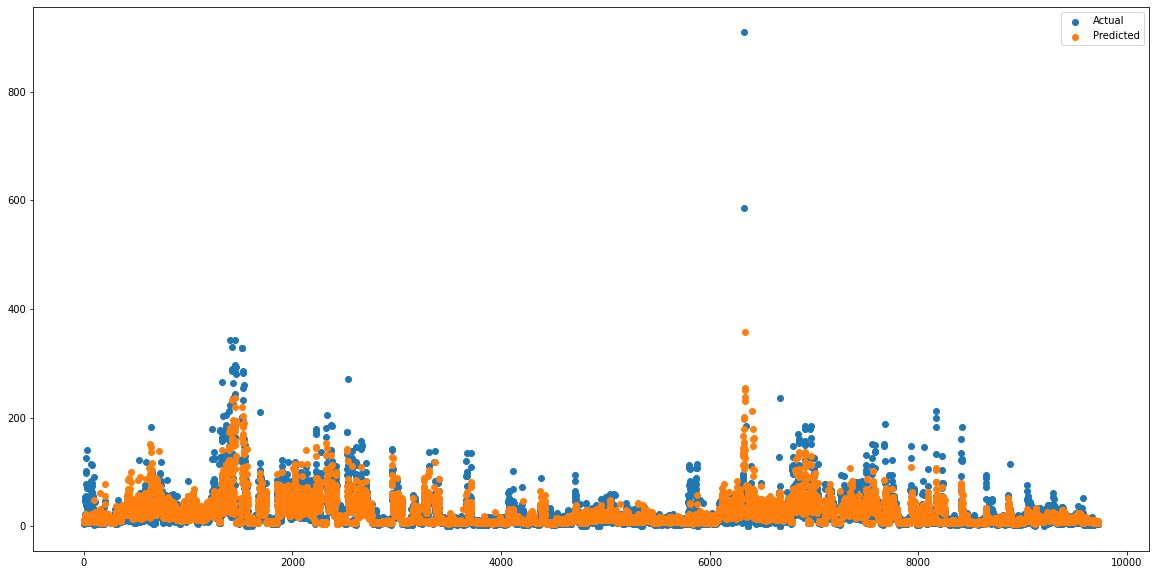

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_test.index,y_test)
ax.scatter(X_test.index,y_test_pred)
ax.legend(['Actual','Predicted'])

In [ ]:
###Start with the peru prediction?
df_peru = pd.read_csv('peru_sensor_city_merged_data_mar_aug.csv')

In [ ]:
df_peru.head()

,timestamp,PM25,latitude,longitude,week_x,PRECIP_Sensor,POP_DEN_Sensor,AOD_Sensor,NO2_Sensor,PRECIP_City,AOD_City,NO2_City,POP_DEN_City,Avg_POP_DEN
0,17/03/20,16.140243,-12.1097,-77.0519,2020-03-17_2020-03-24,0.002912,5025.667969,101.842857,0.000021,0.005618,53.557736,0.000014,573.276428,25
1,24/03/20,15.744527,-12.1097,-77.0519,2020-03-24_2020-03-31,0.015290,5025.667969,153.209375,0.000022,0.016425,83.177394,0.000016,573.276428,25
2,31/03/20,15.615435,-12.1097,-77.0519,2020-03-31_2020-04-07,0.027365,5025.667969,147.629306,0.000023,0.017716,61.845249,0.000016,573.276428,25
3,07/04/20,21.802438,-12.1097,-77.0519,2020-04-07_2020-04-14,0.000000,5025.667969,119.308542,0.000021,0.000322,63.577451,0.000014,573.276428,25
4,14/04/20,19.419179,-12.1097,-77.0519,2020-04-14_2020-04-21,0.000042,5025.667969,69.069129,0.000022,0.000448,34.772960,0.000016,573.276428,25


In [ ]:
X_peru = df_peru.iloc[:,5:]
y_peru=df_peru['PM25']

X_peru.rename(columns={'PRECIP_City':'city_PRECIP', 'AOD_City':'city_AOD', 'NO2_City':'city_NO2', 
       'POP_DEN_City':'city_POP_DEN', 'Avg_POP_DEN':'average_population_density'},inplace=True)

X_peru = X_peru[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density']]
# X_peru.iloc[:,0], X_peru.iloc[:,1] = X_peru.iloc[:,1], X_peru.iloc[:,0]

Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density'],
      dtype='object')
Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density'],
      dtype='object')


In [ ]:
print(X_peru.columns)
print(X_train.columns)

Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density'],
      dtype='object')
Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density'],
      dtype='object')


In [ ]:
print(X_peru.head())
print(y_peru.head())

   POP_DEN_Sensor  AOD_Sensor  ...  city_POP_DEN  average_population_density
0     5025.667969  101.842857  ...    573.276428                          25
1     5025.667969  153.209375  ...    573.276428                          25
2     5025.667969  147.629306  ...    573.276428                          25
3     5025.667969  119.308542  ...    573.276428                          25
4     5025.667969   69.069129  ...    573.276428                          25

[5 rows x 9 columns]
0    16.140243
1    15.744527
2    15.615435
3    21.802438
4    19.419179
Name: PM25, dtype: float64


In [ ]:
y_peru_pred = reg.predict(X_peru)

In [ ]:
print("Peru Validation: {}".format(mean_squared_error(y_peru_pred,y_peru, squared=False)))
print("Peru Validation: {}".format(r2_score(y_peru_pred,y_peru)))

Peru Validation: 12.745925229330666
Peru Validation: -9.948507817048576


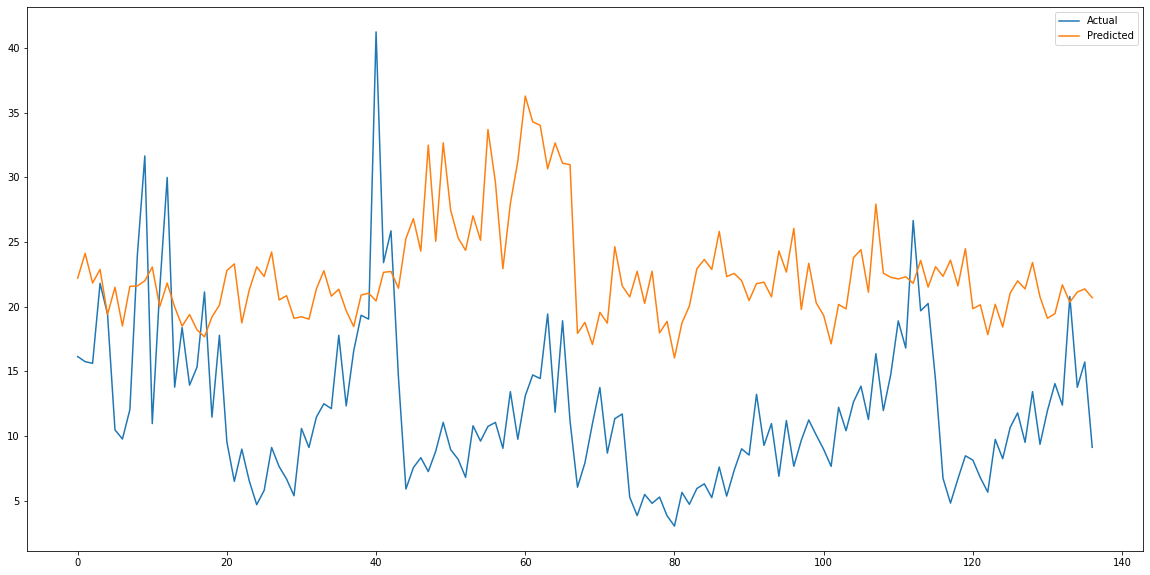

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_peru.index,y_peru) 
ax.scatter(X_peru.index,y_peru_pred) 
ax.legend(['Actual','Predicted'])

In [ ]:
from xgboost import XGBRegressor
from math import sqrt
XGB_model = XGBRegressor( 
          colsample_bytree=0.7, learning_rate=0.05, 
          max_depth=6, min_child_weight=4,  n_estimators=500,
          nthread=4, objective='reg:linear', seed= 42,
          reg_alpha=0, reg_lambda=1, 
          silent=True, subsample=0.7)

In [ ]:
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=True, subsample=0.7, verbosity=1)

In [ ]:
y_test_pred  = XGB_model.pred(X_test)

In [ ]:
print("XGB R2 : {}".format(r2_score(y_test_pred,y_test)))
print("XGB RMSE : {}".format(mean_squared_error(y_test_pred,y_test, squared=False)))

XGB R2 : 0.20802318395333308
XGB RMSE : 20.261013273407414


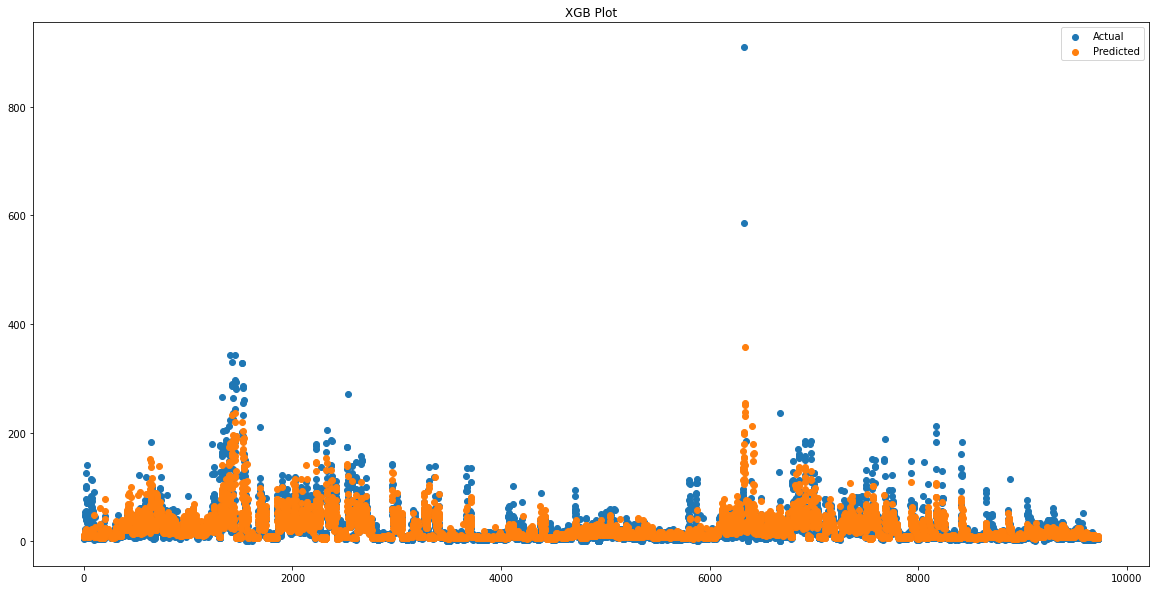

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.title.set_text('XGB Plot')
ax.scatter(X_test.index,y_test)
ax.scatter(X_test.index,y_test_pred)
ax.legend(['Actual','Predicted'])

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(XGB_model, X_train, y_train, cv=3,
                        scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),
                        return_train_score=True)

In [ ]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_root_mean_squared_error', 'train_neg_root_mean_squared_error', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])


In [ ]:
print(scores)

{'fit_time': array([20.86345434, 21.64402556, 21.26254058]), 'score_time': array([0.36699104, 0.34672713, 0.35594869]), 'test_r2': array([0.41525021, 0.28011817, 0.5417082 ]), 'train_r2': array([0.80311676, 0.8064169 , 0.81651519]), 'test_neg_root_mean_squared_error': array([-26.08326183, -23.5616152 , -16.4361953 ]), 'train_neg_root_mean_squared_error': array([-11.61387545, -13.21628099, -13.6811954 ]), 'test_neg_mean_absolute_error': array([-12.20713359,  -7.44037513,  -8.06721327]), 'train_neg_mean_absolute_error': array([-5.86036014, -7.34264472, -7.15969466])}


In [ ]:
XGB_model.fit(X_train, y_train)
y_XGB_predict = XGB_model.predict(X_test[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density']])

XGB_model_error = sqrt(mean_squared_error(y_test, y_XGB_predict)) 

print(f'XGBoost Mean Squared Error - {XGB_model_error}')

XGBoost Mean Squared Error - 22.756882903326556


In [ ]:
val = pd.read_csv('filtered_sensor_with_city_county.csv')
X_valid = val[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density','week','latitude_sensor','longitude_sensor']]
X_valid = pd.concat([X_valid, X_test])
X_valid = X_valid.dropna()
z_valid = X_valid[['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density']]

In [ ]:
z_valid.columns


Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density'],
      dtype='object')

In [ ]:
X_test.columns

Index(['POP_DEN_Sensor', 'AOD_Sensor', 'PRECIP_Sensor', 'NO2_Sensor',
       'city_PRECIP', 'city_AOD', 'city_NO2', 'city_POP_DEN',
       'average_population_density', 'week', 'latitude_sensor',
       'longitude_sensor'],
      dtype='object')

In [ ]:
z_valid.shape

(187233, 9)

In [ ]:
predd = reg.predict(z_valid.astype('float32'))

In [ ]:
X_valid['pm25_results'] = predd

In [ ]:
X_valid.head()

,POP_DEN_Sensor,AOD_Sensor,PRECIP_Sensor,NO2_Sensor,city_PRECIP,city_AOD,city_NO2,city_POP_DEN,average_population_density,week,latitude_sensor,longitude_sensor,pm25_results
0,57.378262,267.330997,0.004057,0.000048,0.005369,267.229064,0.000060,44.005589,447.588087,2020-01-07_2020-01-14,21.6472,84.8444,41.255717
1,57.378262,256.822159,0.000000,0.000050,0.001163,271.332195,0.000056,44.005589,447.588087,2020-01-14_2020-01-21,21.6472,84.8444,51.189405
2,57.378262,371.859848,0.000000,0.000040,0.001193,354.427989,0.000045,44.005589,447.588087,2020-01-21_2020-01-28,21.6472,84.8444,51.103524
3,57.378262,638.492436,0.000127,0.000033,0.001517,671.318141,0.000035,44.005589,447.588087,2020-01-28_2020-02-04,21.6472,84.8444,78.865507
4,57.378262,402.281250,0.014737,0.000028,0.010571,397.353205,0.000036,44.005589,447.588087,2020-02-04_2020-02-11,21.6472,84.8444,52.824735


In [ ]:
X_train.average_population_density.unique()

array([  26.83302887,    3.05703522,   56.29091391,  447.58808746,
        300.9828296 ,  168.14655846,   73.00944038,  147.71254322,
         70.51324177,   32.02404337,  679.95145603, 1220.34856557,
        126.16067515,  103.18771664,   80.63693517,  110.08638455,
        104.74226227,   47.66241311,   20.3131532 ,   67.47187733,
        190.85475241,   72.86791451,  208.90643864,  114.80215948,
         73.49255499,   30.36476484,   65.95114807,  221.93194413,
        112.83072735,  138.34256694,  126.50453872,  384.90229153,
        269.95560732,  477.32803408,    6.58723482,  223.03463527,
         43.06460981,   10.7822839 ,   15.99725758,   83.86596609,
        138.14574743,   50.68799787,   12.82656136,   18.42181406,
         81.37076958,   70.91517387,  102.60771625,  107.24825109,
         31.99641576,    3.29967099])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_valid.to_csv('/content/drive/My Drive/UNICEF/validation_results.csv')

In [ ]:
df_peru = pd.read_csv('peru_sensor_city_merged_data_mar_aug.csv')

In [ ]:
df_peru.shape

(137, 13)

In [ ]:
df_peru.head()

,timestamp,PM25,latitude,longitude,week_x,PRECIP_Sensor,POP_DEN_Sensor,AOD_Sensor,NO2_Sensor,PRECIP_City,AOD_City,NO2_City,POP_DEN_City
0,2020-03-17,16.140243,-12.1097,-77.0519,2020-03-17_2020-03-24,0.002912,5025.667969,101.842857,0.000021,0.005618,53.557736,0.000014,573.276428
1,2020-03-24,15.744527,-12.1097,-77.0519,2020-03-24_2020-03-31,0.015290,5025.667969,153.209375,0.000022,0.016425,83.177394,0.000016,573.276428
2,2020-03-31,15.615435,-12.1097,-77.0519,2020-03-31_2020-04-07,0.027365,5025.667969,147.629306,0.000023,0.017716,61.845249,0.000016,573.276428
3,2020-04-07,21.802438,-12.1097,-77.0519,2020-04-07_2020-04-14,0.000000,5025.667969,119.308542,0.000021,0.000322,63.577451,0.000014,573.276428
4,2020-04-14,19.419179,-12.1097,-77.0519,2020-04-14_2020-04-21,0.000042,5025.667969,69.069129,0.000022,0.000448,34.772960,0.000016,573.276428


In [ ]:
df_peru.columns

Index(['timestamp', 'PM25', 'latitude', 'longitude', 'week_x', 'PRECIP_Sensor',
       'POP_DEN_Sensor', 'AOD_Sensor', 'NO2_Sensor', 'PRECIP_City', 'AOD_City',
       'NO2_City', 'POP_DEN_City'],
      dtype='object')

In [ ]:
df_peru_train = df_peru[['PRECIP_Sensor','POP_DEN_Sensor', 'AOD_Sensor', 
                         'NO2_Sensor', 'PRECIP_City', 'AOD_City',
                         'NO2_City', 'POP_DEN_City']]

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       scoring_test=r2_score, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    score = scoring_test(y_test_data, pred)
    
    return [best_model, pred, score]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Defining our estimator, the algorithm to optimize
models_to_train = [XGBRegressor(), LGBMRegressor(), RandomForestRegressor()]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # XGBoost
        'n_estimators': [400, 700, 1000],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [15,20,25],
        'reg_alpha': [1.1, 1.2, 1.3],
        'reg_lambda': [1.1, 1.2, 1.3],
        'subsample': [0.7, 0.8, 0.9]
    },
    { # LightGBM
        'n_estimators': [400, 700, 1000],
        'learning_rate': [0.12],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [4],
        'num_leaves': [10, 20],
        'reg_alpha': [1.1, 1.2],
        'reg_lambda': [1.1, 1.2],
        'min_split_gain': [0.3, 0.4],
        'subsample': [0.8, 0.9],
        'subsample_freq': [10, 20]
    }, 
    { # Random Forest
        'max_depth':[3, 5, 10, 13], 
        'n_estimators':[100, 200, 400, 600, 900],
        'max_features':[2, 4, 6, 8, 10]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(X_train, X_test, y_train, y_test, 
                                 model, params, cv=2)
    models_preds_scores.append(result)

Fitting 2 folds for each of 486 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 18.9min


In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2]))

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [ ]:
stack = StackingCVRegressor(regressors=(ridge, lasso, svr, rf, lgbm, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=True,
                            )

stack.fit(X_train, y_train)

TypeError: ignored

In [ ]:
X.columns

AttributeError: ignored